# Block layer latencies
Blklayer results from reading to the drp nvme-sssd. Each ssd was formatted with zfs.
The data are collected: blktrace->blkparse->btt

In [2]:
from os.path import join
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
data = { 
    "ffb02_write": "20180309_ffb02/nvme0n1_write_q2c.csv", "ffb02_write_proper": "20180309_ffb02/nvme0n1_write_proper_q2c.csv",
        "ffb03_read": "nvme0n1_write_q2c.csv"
       }

In [34]:
basepath = "/reg/data/ana01/temp/xrd/wilko/drp"
#basepath = "/home/wilko/psdm/data/drp"

# latency data for driver to completion
#dq = pd.read_csv(join(basepath, "2018-03-08-nvme1n1_d2c_latency.csv"), names=["ts","lat"])
# latency data for queue to completion
#dq = pd.read_csv(join(basepath, "2018-03-08-nvme1n1_q2c_latency.csv"), names=["ts","lat"])
#dq = pd.read_csv(join(basepath, "20180309_ffb03/nvme2n1_write.q2c_lantency_q2c.csv"), names=["ts","lat"])
#dq = pd.read_csv(join(basepath, "20180309_ffb03/nvme2n1_read_q2c.csv"), names=["ts","lat"])
dq = pd.read_csv(join(basepath, data["ffb02_write_proper"]), names=["ts","lat"])


dq.lat *= 1000.   #latency in ms 

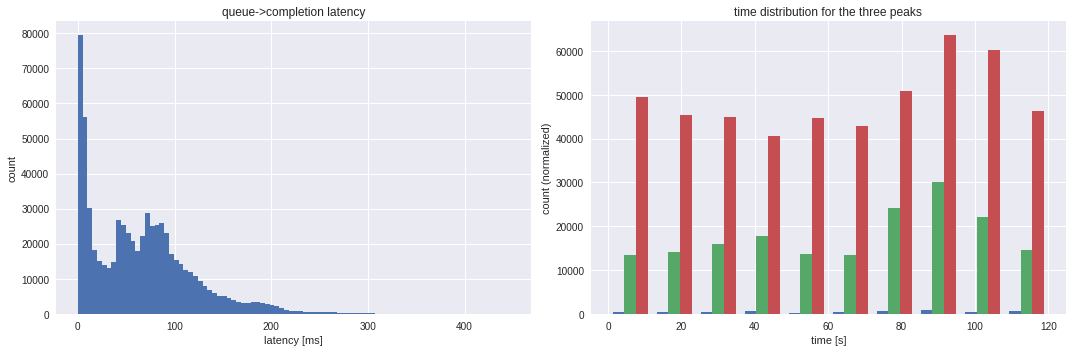

In [36]:
plt.style.use('seaborn')
fig = plt.figure(figsize=(15,5))
fig.add_subplot(121)
cut = (dq.lat < 10000.)
dq.loc[cut].lat.hist(bins=90)
plt.xlabel("latency [ms]")
plt.ylabel("count")
plt.title("queue->completion latency")

# Select the three peaks and plot how the entries
# are distributed in time (even it looks like) 
fig.add_subplot(122)
cut = (dq.lat < 0.1)
cut1 = (dq.lat > 0.1) & (dq.lat < 20.0)
cut2 = (dq.lat > 20.0) 
q = dq.loc[cut].ts
q1 = dq.loc[cut1].ts
q2 = dq.loc[cut2].ts
q1.values
plt.hist((q.values,q1.values,q2.values)) # stacked=True)
plt.xlabel("time [s]")
plt.ylabel("count (normalized)")
plt.title("time distribution for the three peaks")

plt.tight_layout()
plt.show()

In [29]:
dq.loc[dq.lat<110.1].describe()

,ts,lat
count,841106.000000,841106.000000
mean,56.619329,41.990064
std,32.545913,30.226045
min,0.000101,0.007000
25%,28.388094,12.539000
50%,56.565495,39.702000
75%,84.186337,66.750750
max,119.998320,110.099000
